## import library

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import numpy as np 
import matplotlib.pyplot as plt 

## Get MNIST Data. 
### MNIST data loacted in tensorflow > keras > datasets > mnist 
### Split data to (train images, train labels) and (test images, test labels)

In [4]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


### There are Total 60000 Train images and Train labels. (6000 images for single class)
### Shape of single image is 28 x 28 (pixel)
### 

In [45]:
print('Shape of Train images :',train_images.shape)
print('Shape of Train labels : ', train_labels.shape)
print('\nShape of Test images : ', test_images.shape)
print("Shape of Test labels : ",test_labels.shape)

Shape of Train images : (60000, 28, 28)
Shape of Train labels :  (60000,)

Shape of Test images :  (10000, 28, 28)
Shape of Test labels :  (10000,)


In [46]:
print('Train labels : ',train_labels)

Train labels :  [5 0 4 ... 5 6 8]


## Plot first train image. 
### when value is close to 0 : dark 
### when value is close to 255 : white

In [47]:
print(train_images[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

### Plot First 10 Train images and Corresponding labels  

First 10 Train images in MNIST dataset



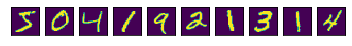


Train labels match with Train label sequentialy
 [5 0 4 1 9 2 1 3 1 4]


In [6]:
print('First 10 Train images in MNIST dataset\n')
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i])
plt.show()
print('\nTrain labels match with Train label sequentialy\n',train_labels[:10])



## Important
### Change data shape (60000 x 28 x 28) to (60000 x 28 x 28 x 1)


In [9]:
train_images = tf.reshape(train_images, [-1, 28, 28, 1])
test_images = tf.reshape(test_images, [-1, 28, 28, 1])

# Select one convolution model below 
## There are 3 example models. 
## 3, 5, 7 layer each 
## MODEL 1 : 3 Layers with 1 Convolution layer  
## MODEL 2 : 5 Layers with 2 Convolution layer 
## MODEL 3 : 7 Layers with 4 Convolution layer 

In [16]:
def select_model(model_number):
    if model_number == 1:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2 
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 3

    if model_number == 2:
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape=(28,28,1)),     # layer 1 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3 
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 4
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 5
                    
    if model_number == 3: 
        model = keras.models.Sequential([
                    keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28, 28,1)),  # layer 1
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 3
                    keras.layers.Conv2D(64, (3,3), activation = 'relu'),                            # layer 4
                    keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                    keras.layers.Conv2D(128, (3,3), activation = 'relu'),                           # layer 6
                    keras.layers.Flatten(),
                    keras.layers.Dense(10, activation = 'softmax')])                                # layer 7
    
    return model 




In [17]:
model1 = select_model(1)
model2 = select_model(2)
model3 = select_model(3)

## If you want to see information of model, model.summary() will help
### summary() is also built in function 

In [15]:
model1.summary()
model2.summary()
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_1 (Dense)             (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
_________________________________________________________________
 Layer (type)               

## Components in training step 
### Optimizer, Loss function, accuracy metrics 

In [18]:
model1.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model2.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model3.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

## Training Step 
## Training for 5 epochs. 

In [19]:
model1.fit(train_images, train_labels,  epochs = 5)
model2.fit(train_images, train_labels,  epochs = 5)
model3.fit(train_images, train_labels,  epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6418 - accuracy: 0.9395
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0826 - accuracy: 0.9759
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0693 - accuracy: 0.9788
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0635 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0544 - accuracy: 0.9834
Epoch 1/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3443 - accuracy: 0.9463
Epoch 2/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0699 - accuracy: 0.9796
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0539 - accuracy: 0.9836
Epoch 4/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0478 - accuracy: 0.9855
Epoch 5/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.0387 - ac

## Test Step 
## Perform Test with Test data 

In [21]:
test_loss1, accuracy1 = model1.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss1 : ', test_loss1)
print('Test accuracy1 :', accuracy1)

test_loss2, accuracy2 = model2.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss2 : ', test_loss2)
print('Test accuracy2 :', accuracy2)

test_loss3, accuracy3 = model3.evaluate(test_images, test_labels, verbose = 2)
print('\nTest loss3 : ', test_loss3)
print('Test accuracy3 :', accuracy3)

313/313 - 0s - loss: 0.0972 - accuracy: 0.9774 - 445ms/epoch - 1ms/step

Test loss1 :  0.09719056636095047
Test accuracy1 : 0.977400004863739
313/313 - 1s - loss: 0.0687 - accuracy: 0.9808 - 634ms/epoch - 2ms/step

Test loss2 :  0.06874635070562363
Test accuracy2 : 0.9807999730110168
313/313 - 1s - loss: 0.0436 - accuracy: 0.9861 - 813ms/epoch - 3ms/step

Test loss3 :  0.04358599707484245
Test accuracy3 : 0.9861000180244446


## Before prediction, change test image's type to float 32. 

In [22]:
test_images = tf.cast(test_images, tf.float32)
pred1 = model1.predict(test_images)
pred2 = model2.predict(test_images)
pred3 = model3.predict(test_images)
Number = [0,1,2,3,4,5,6,7,8,9]

313/313 [==============================] - 1s 2ms/step


In [23]:
print('Prediction1 : ', pred1.shape)
print('Prediction2 : ', pred2.shape)
print('Prediction3 : ', pred3.shape)
print('Test labels : ', test_labels.shape)

Prediction1 :  (10000, 10)
Prediction2 :  (10000, 10)
Prediction3 :  (10000, 10)
Test labels :  (10000,)


## Functions for plot images, probability

In [24]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(Number[predicted_label],
                                100*np.max(predictions_array),
                                Number[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  plt.xticks(Number)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [25]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

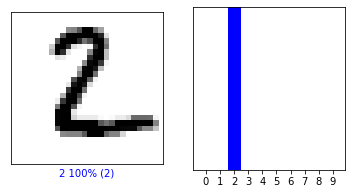

In [33]:
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, pred1, test_labels, test_images)
plot_image(i, pred2, test_labels, test_images)
plot_image(i, pred3, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, pred1,  test_labels)
plot_value_array(i, pred2,  test_labels)
plot_value_array(i, pred3,  test_labels)
plt.show()

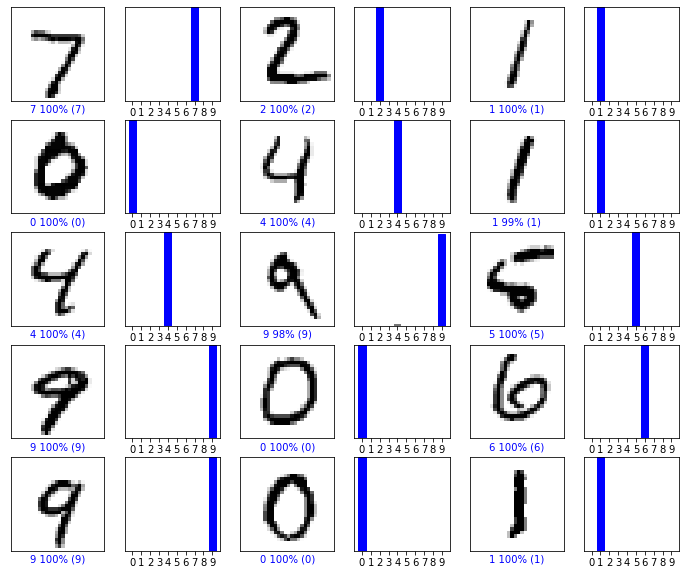

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred1, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred1, test_labels)
plt.show()

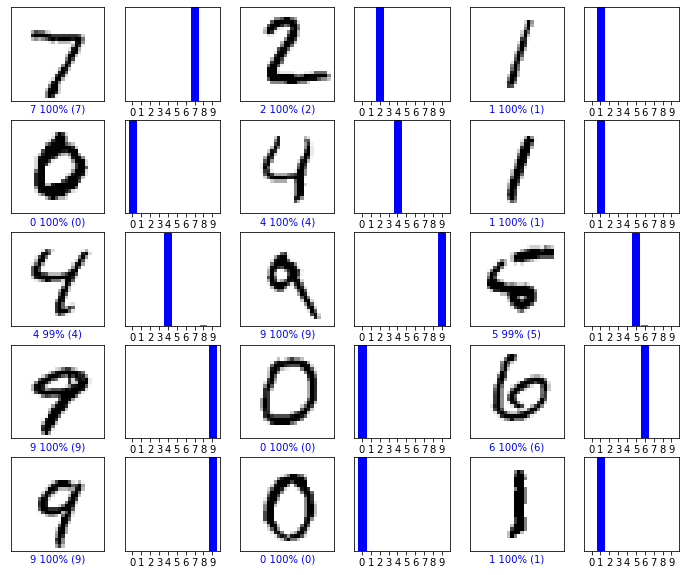

In [35]:
num_rows = 5
num_cols = 3
num_images2 = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images2):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred2, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred2, test_labels)
plt.show()

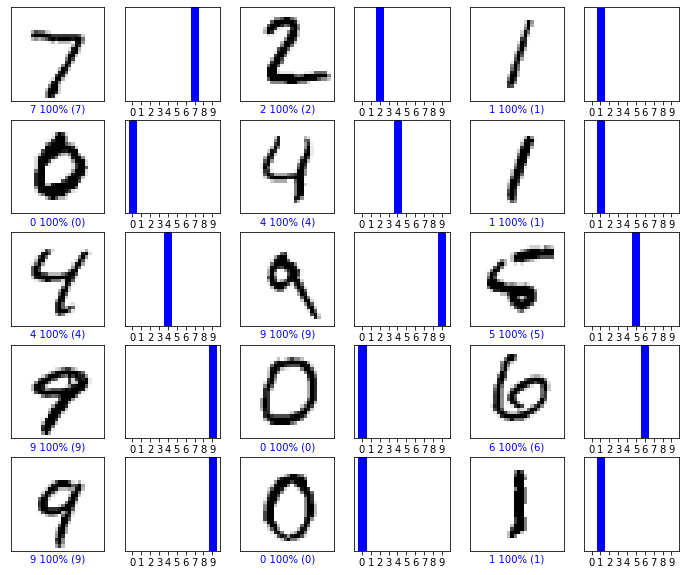

In [36]:
num_rows = 5
num_cols = 3
num_images3 = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images3):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, pred3, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, pred3, test_labels)
plt.show()

## Plot images and probability that model predicted wrong

In [37]:
def error_mnist(prediction_array, true_label):
    error_index = []
    
    for i in range(true_label.shape[0]):
        if np.argmax(prediction_array[i]) != true_label[i]:
            error_index.append(i)
    return error_index

# change num_cols, num_rows if you want to see more result.  
def plot_error(index, prediction_array, true_label):
    num_cols = 5
    num_rows = 5
    plt.figure(figsize=(2*2*num_cols, 2*num_rows))

    assert len(index) < num_cols * num_rows
    for i in range(len(index)):
        plt.subplot(num_rows, 2*num_cols, 2*i+1)
        idx = index[i]
        plt.imshow(test_images[idx])
        plt.subplot(num_rows, 2*num_cols, 2*i+2)
        plt.bar(range(10), prediction_array[idx])
        plt.xticks(Number)

## Find index of wrong prediction
## Plot first 10 wrong predicted images and probability

In [41]:
index1 = error_mnist(pred1, test_labels)
index_slice1 = index1[:10]
print(index1[:10])

index2 = error_mnist(pred2, test_labels)
index_slice2 = index2[:10]
print(index2[:10])

index3 = error_mnist(pred3, test_labels)
index_slice3 = index3[:10]
print(index3[:10])

[247, 259, 290, 321, 340, 403, 431, 445, 497, 543]
[36, 41, 62, 87, 243, 247, 259, 318, 324, 449]
[247, 317, 321, 336, 340, 445, 460, 543, 582, 583]


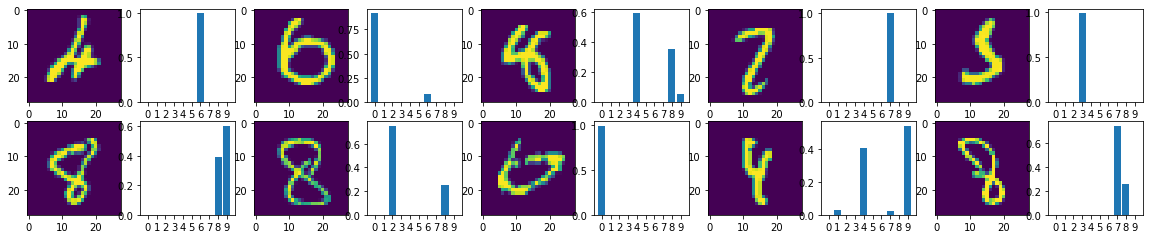

In [42]:
plot_error(index_slice1, pred1, test_labels)

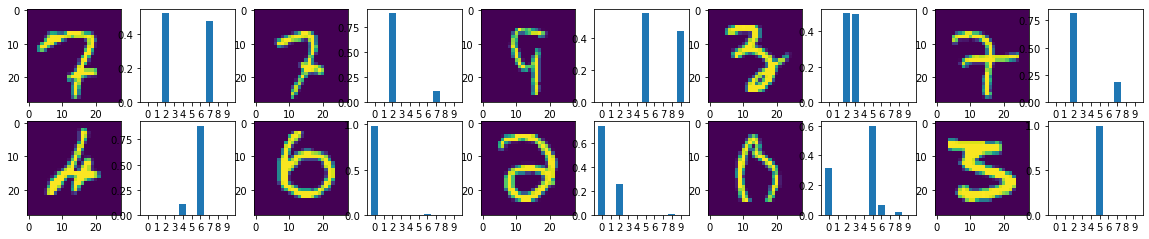

In [43]:
plot_error(index_slice2, pred2, test_labels)

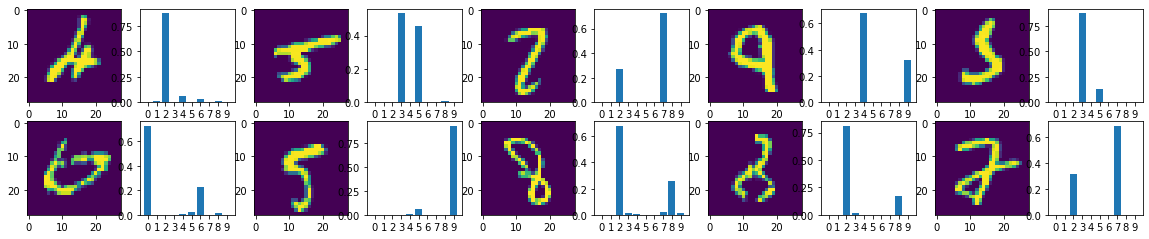

In [44]:
plot_error(index_slice3, pred3, test_labels)

In [ ]:
DONE